## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import scipy.stats as st
import random
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata





# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Combine the data into a single dataset using 
merged_dataset = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID"])
merged_dataset 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Display the data table for preview
merged_dataset.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Check the number of mice using .count()
merged_dataset.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint using dropping rows with missing information using .loc function. Then find duplicate mice within "MouseID" 
duplicate_id = merged_dataset.loc[merged_dataset.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"] 

#Print the unique value/s that are duplicated
duplicate_id.unique() #Duplicate mouse ID is g989

array(['g989'], dtype=object)

In [6]:
#Tried what Rhyce had and received an error that the index numbers do not exist.
#Get the index names for which column Mouse ID has the value g989
#index_names = merged_dataset[merged_dataset["Mouse ID"] == "g989"].index
#index_names

#Create a new df by taking the merged_dataset and dropping the duplicate "Mouse ID" values.
#mouse_study_df = mouse_study_df.drop(index_names, inplace=True)
#mouse_study_df

#-------------------------------------------------------------------------------------------------------

#Tried what Matt had and still got back 249 for the count of unique mice.
#What Matt used:
#data_and_results = merged_dataset[merged_dataset["Mouse ID"].isin(duplicate_id) == False]
#data_and_results

#---------------------------------------------------------------------------------

#Moving forward on data with total mice equal to 249, rather than 248

#Create a new df by taking the merged_dataset and dropping the duplicate "Mouse ID" values.
mouse_study_df = merged_dataset.drop_duplicates(subset='Mouse ID')
mouse_study_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Check the number of mice in the clean DataFrame.
num_of_mice = len(mouse_study_df['Mouse ID'].unique())
num_of_mice

249

## Summary Statistics

In [8]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_tumors = mouse_study_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumors

median_tumors = mouse_study_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumors

tumor_variance = mouse_study_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_variance

tumor_std = mouse_study_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_std

tumor_sem = mouse_study_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_sem

#Create df using a dictionary
summary_df = pd.DataFrame({"mean": mean_tumors, "median": median_tumors, "variance": tumor_variance, "standard deviation": tumor_std, "SEM":tumor_sem})
summary_df



,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [9]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


## Bar and Pie Charts

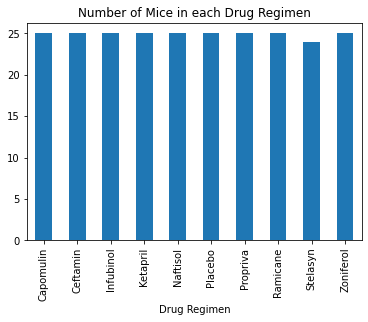

In [24]:
# Use Pandas to generate a bar plot showing the total number of
# mice in each treatment regimen throughout the course of the study. 

#Get total number of mice for each treatment regimen. 
mouse_count_per_regimen = mouse_study_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mouse_count_per_regimen

#Not sure why the y-axis title is not showing.
bar_plot = mouse_count_per_regimen.plot(kind='bar', x= "Drug Regimen", y="Number of Mice", title="Number of Mice in each Drug Regimen")
plt.show()

## Note: this plot will be identical to the one that uses Pyplot

In [11]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

##  Note: this plot will be identical to the one that uses Pandas

([<matplotlib.patches.Wedge at 0x24992234ba8>,
 [Text(-0.9995366940989605, 0.568705896883197, 'Male'),
  Text(0.9560785769642225, -0.5439795535404501, 'Female')],
 [Text(-0.5649555227515863, 0.32144246345572, '50.2%'),
  Text(0.5214974056168485, -0.29671612011297277, '49.8%')])

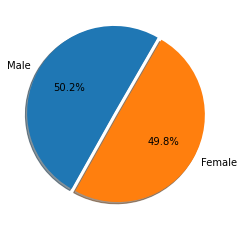

In [26]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice

#Determine number of male and female mice.
gender_count = mouse_study_df["Sex"].value_counts()
gender_count

#Lable the variables
gender = ["Male", "Female"]

gender_count = [125,124]

explode = (0.05, 0)

plt.pie(gender_count, explode = explode, labels = gender, autopct="%1.1f%%", shadow = True, startangle=60)

## Note: this plot will be identical to the one that uses Pyplot

In [13]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice

##  Note: this plot will be identical to the one that uses Pandas

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [17]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin


In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.
